In [7]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
#loading the data
df=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\healthcare_dataset.csv")
df

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Cholesterol_Level,Diabetes,Hospital_Visits_Per_Year,Medication_Adherence,Smoking_Status,Exercise_Frequency
0,P001,69,Male,33.8,Hypertension,Normal,No,0,Poor,Non-Smoker,0
1,P002,32,Female,21.7,Hypertension,Normal,No,0,Good,Smoker,5
2,P003,78,Male,40.0,Hypertension,Low,No,7,Good,Smoker,2
3,P004,38,Male,24.2,Normal,High,No,1,Good,Smoker,6
4,P005,41,Female,39.5,Prehypertension,High,No,11,Good,Smoker,0
...,...,...,...,...,...,...,...,...,...,...,...
95,P096,52,Female,35.0,Normal,High,No,0,Good,Non-Smoker,1
96,P097,82,Female,19.4,Normal,Low,No,4,Good,Non-Smoker,0
97,P098,64,Female,39.9,Hypertension,Normal,No,8,Moderate,Smoker,5
98,P099,20,Male,28.6,Hypertension,Low,No,11,Moderate,Smoker,2


In [5]:
##handling missing values
df.isnull().sum()

Patient_ID                  0
Age                         0
Gender                      0
BMI                         0
Blood_Pressure              0
Cholesterol_Level           0
Diabetes                    0
Hospital_Visits_Per_Year    0
Medication_Adherence        0
Smoking_Status              0
Exercise_Frequency          0
dtype: int64

Accuracy of KNN model: 88.00%


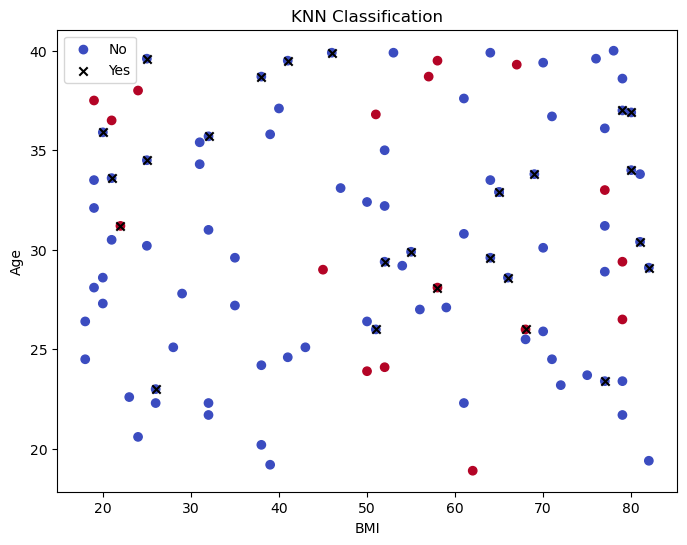

In [6]:
#feature and targeted variable
X=df[['Age','BMI']] # independant variables
y=df['Diabetes'] # dependant variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create KNN model with K=6
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN model: {accuracy * 100:.2f}%')
# Visualizing the results
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['BMI'], c=df['Diabetes'].apply(lambda x: 1 if x == 'Yes' else 0), cmap='coolwarm')
plt.title('KNN Classification')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.scatter(X_test['Age'], X_test['BMI'], marker='x', color='black', label='Test Points')
plt.legend(['No', 'Yes','Test Points'])
plt.show()

In [10]:
##finding no of k
import math
math.sqrt(len(X_test))

5.0

In [7]:
 knn.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No'], dtype=object)

In [8]:
 knn.predict([[45,80],[90,78]])

array(['No', 'No'], dtype=object)

# K-MEANS CLUSTERING MODEL

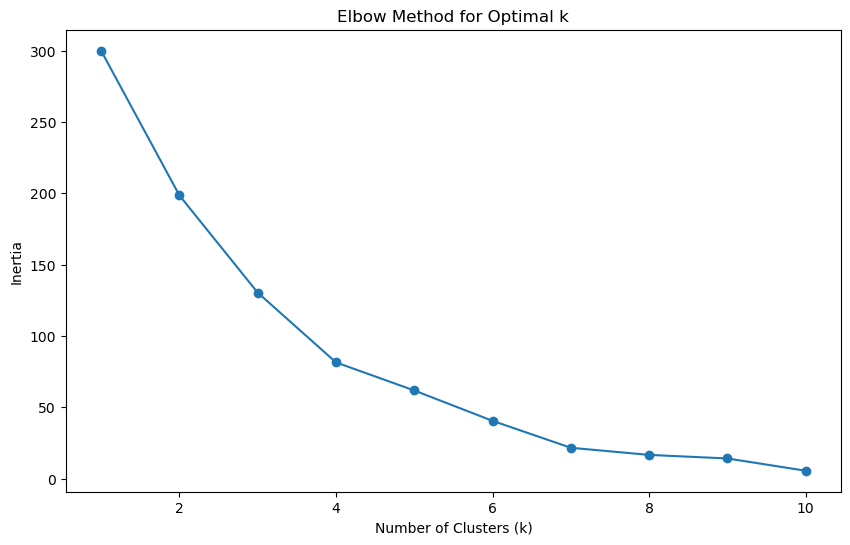

In [12]:
# Loading my dataset
df = pd.read_csv('C:\\Users\\ADMIN\\Downloads\\healthcare_dataset.csv')
from sklearn.preprocessing import LabelEncoder

# Labeling encode categorical variables
label_encoder = LabelEncoder()
df['Blood_Encoded'] = label_encoder.fit_transform(df['Blood_Pressure'])
df['Diabetes_Encoded'] = label_encoder.fit_transform(df['Diabetes'])
df['Smoking_Status'] = label_encoder.fit_transform(df['Smoking_Status'])
#  encoding data for clustering
X = df[['Blood_Encoded', 'Diabetes_Encoded', 'Smoking_Status']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
# Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Ploting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_


# Print the clustered data
print("Clustered Data:")
print(df)

Clustered Data:
   Patient_ID  Age  Gender   BMI   Blood_Pressure Cholesterol_Level Diabetes  \
0        P001   69    Male  33.8     Hypertension            Normal       No   
1        P002   32  Female  21.7     Hypertension            Normal       No   
2        P003   78    Male  40.0     Hypertension               Low       No   
3        P004   38    Male  24.2           Normal              High       No   
4        P005   41  Female  39.5  Prehypertension              High       No   
..        ...  ...     ...   ...              ...               ...      ...   
95       P096   52  Female  35.0           Normal              High       No   
96       P097   82  Female  19.4           Normal               Low       No   
97       P098   64  Female  39.9     Hypertension            Normal       No   
98       P099   20    Male  28.6     Hypertension               Low       No   
99       P100   18  Female  24.5           Normal            Normal       No   

    Hospital_Visits_Per

In [29]:
# Analyzing clusters
for cluster in range(5):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster].value_counts())


Cluster 0:
Patient_ID  Age  Gender  BMI   Blood_Pressure   Cholesterol_Level  Diabetes  Hospital_Visits_Per_Year  Medication_Adherence  Smoking_Status  Exercise_Frequency  Blood_Encoded  Diabetes_Encoded  Cluster
P025        79   Male    29.4  Normal           Normal             Yes       4                         Moderate              1               0                   1              1                 0          1
P032        68   Female  26.0  Normal           Normal             Yes       11                        Good                  0               2                   1              1                 0          1
P037        21   Male    36.5  Normal           Low                Yes       1                         Good                  0               2                   1              1                 0          1
P038        77   Female  33.0  Normal           Normal             Yes       10                        Moderate              0               5                   1   

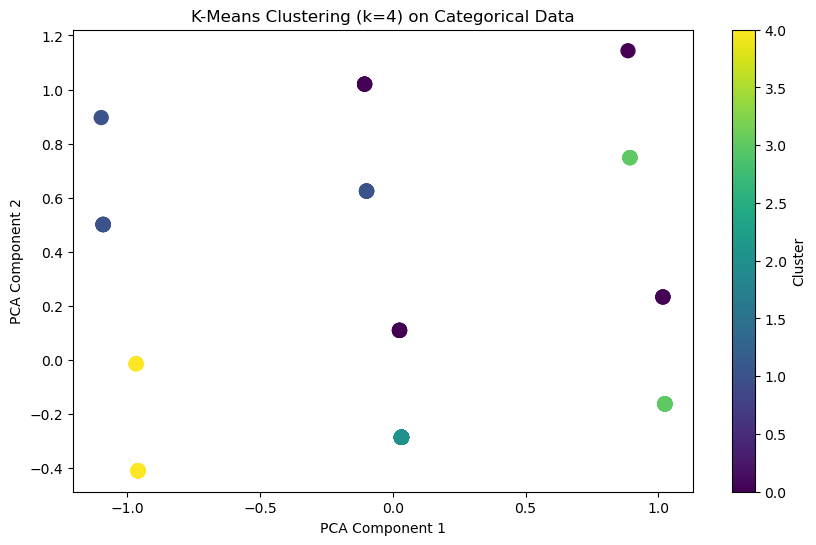

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing dimensions to 2D using Principal component analysis PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Ploting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering (k=4) on Categorical Data')
plt.colorbar(label='Cluster')
plt.show()

<Figure size 1000x600 with 0 Axes>

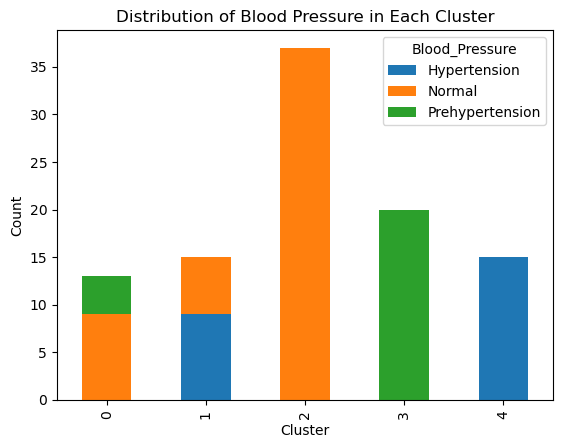

<Figure size 1000x600 with 0 Axes>

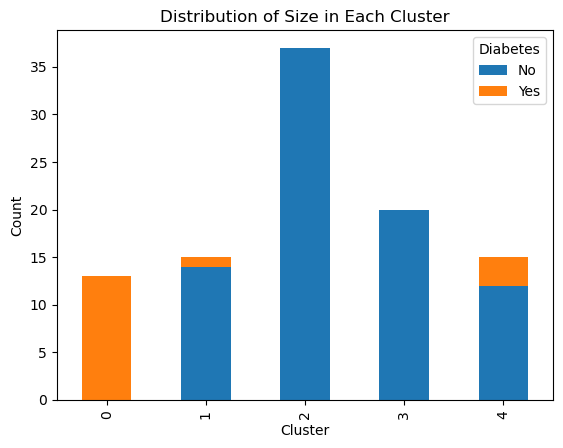

<Figure size 1000x600 with 0 Axes>

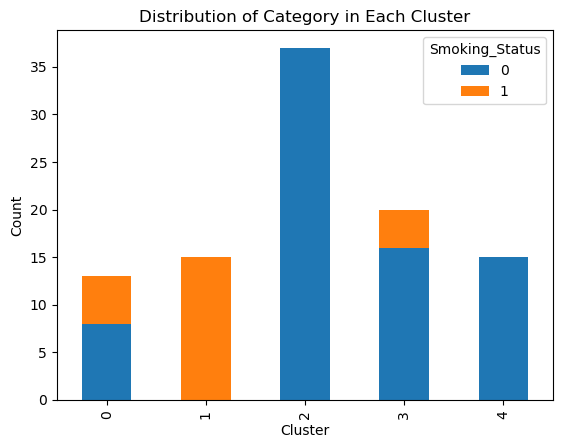

In [31]:
# Visualize the distribution of 'Blood_Pressure' in each cluster
plt.figure(figsize=(10, 6))
pd.crosstab(df['Cluster'], df['Blood_Pressure']).plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure in Each Cluster')
plt.show()

# Visualize the distribution of Diabetes in each cluster
plt.figure(figsize=(10, 6))
pd.crosstab(df['Cluster'], df['Diabetes']).plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Size in Each Cluster')
plt.show()

# Visualize the distribution of 'Category' in each cluster
plt.figure(figsize=(10, 6))
pd.crosstab(df['Cluster'], df['Smoking_Status']).plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Category in Each Cluster')
plt.show()

# OBSERVATIONS
## cluster 0 
* Patients have both Normal and Prehypertension
* all patients have Diabetes
* Most of the patients smoke
## cluster one
* Most of the patients have Hypertension blood pressure and a small percentage have normal
* Almost all patients have No Diabetes
* All patients smoke
## cluster two
* The patients have Normal Blood Pressure
* Almost all the patients have No Diabetes
* The petient do Not smoke
## cluster three
* All the patients have Prehypertension Blood Pressure
* All Patients have No Diabetes
* Almost all Patients do Not smoke

## cluster four
* All patients have Prehypertension 
* Almost all patients have No Diabetes
* All patients do Not smoke